In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/Users/KP/Google/Python/QD")
from sub import parameter, matrix, geometry
from scipy.sparse import csr_matrix, eye, diags
from scipy.sparse.linalg import eigs, spsolve


In [2]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

# Define Geometry

In [3]:
dz = 2e-10
z = np.arange(0, 30e-9, dz)
nz = len(z)
eo = 8.85e-12
er = 3.6
c_array = np.ones(len(z))*er #* eo*er
V = 4
Vi = np.linspace(0, V, nz)
dE = 0.1
y = np.arange(-10, 0, dE) # Energy
kT = 0.0259
q = 1.6e-19

# Define Constant

In [153]:
EH = -5.3 # ev
EL = -2.1 
EF = -5.1

n = 4.1e18/1.42e-9*dz

# Define Inhomogeneous Poisson Matrix

In [154]:
z_boundary = 1 #Dirichlet : 0    Neumann : 1

if z_boundary == 0:
    poisson = diags(-np.append(c_array[1:], V) - np.append(c_array[0], c_array[:-1])) \
          + diags(c_array[1:], 1) + diags(c_array[:-1], -1)
elif z_boundary == 1:
    poisson = diags(-np.append(c_array[1:], c_array[-1]) - np.append(c_array[0], c_array[:-1])) \
          + diags(c_array[1:], 1) + diags(c_array[:-1], -1)
    poisson[-1,-2] *= 2
    #poisson[-1,-1] = 2*c_array[-1] 
    #poisson[-1,-2] = -c_array[-1] *2
poisson /= (dz)
poisson = csr_matrix(poisson)
#p = poisson.todense()

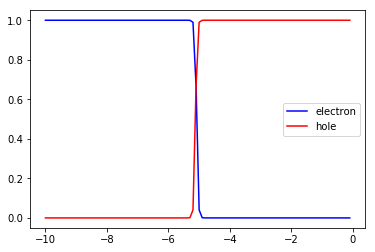

In [155]:
fH = 1/(1/2*np.exp(-(y-EF)/kT)+1)
fL = 1/(1/2*np.exp((y-EF)/kT)+1)
plt.plot(y, fL, 'b', label = 'electron')
plt.plot(y, fH, 'r', label = 'hole')
plt.legend()

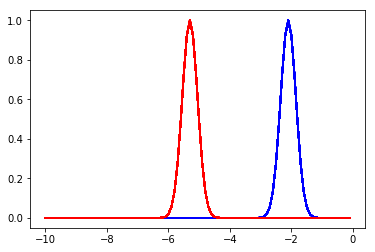

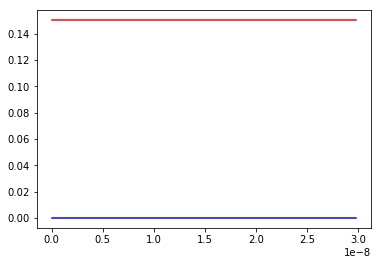

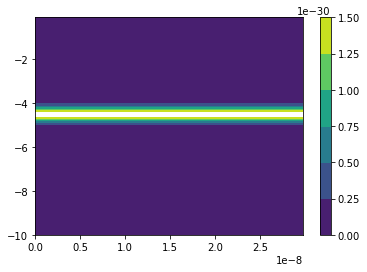

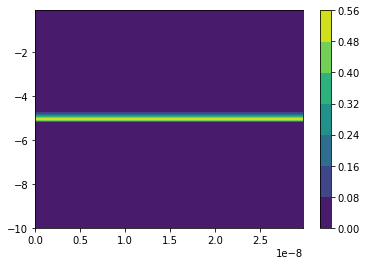

In [171]:
dosH = np.zeros((len(y), len(z)))
dosL = np.zeros((len(y), len(z)))
ne = np.zeros((len(y), len(z)))
nh = np.zeros((len(y), len(z)))

for i in range(len(z)):
    dosH[:,i] = gaussian(y, EH, 0.25)
    dosL[:,i] = gaussian(y, EL, 0.25)
for i in range(len(z)):
    ne[:,i] = dosL[:,i]*fL  # [/E /dz]
    nh[:,i] = dosH[:,i]*fH
plt.plot(y, dosL, 'b', label = 'DOS_E')
plt.plot(y, dosH, 'r', label = 'DOS_H')

neSum = np.sum(ne, axis = 0)*dE  # [/dz]
nhSum = np.sum(nh, axis = 0)*dE 
qden_old = q*n*(nhSum - neSum) # [C/m2/dz]
plt.figure()
plt.plot(z, neSum, 'b', label = 'electron')
plt.plot(z, nhSum, 'r', label = 'hole')
plt.figure()
plt.contourf(z,y, ne)
plt.colorbar()
plt.figure()
plt.contourf(z,y, nh)
plt.colorbar()


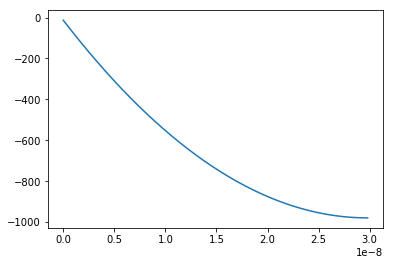

In [172]:
#qden_old /= 1000
#Vz = np.linalg.solve(poisson, -qden_old/eo)
Vz = spsolve(poisson, -qden_old/eo)
#fig, ax1 = plt.subplots(1,2)
plt.plot(z, -Vz)
#plt.ylim([-1.1,0])

In [ ]:
diff = 10
dosH = np.zeros((len(y), len(z)))
dosL = np.zeros((len(y), len(z)))
ne = np.zeros((len(y), len(z)))
nh = np.zeros((len(y), len(z)))

for k in range(10000):
    Vz = spsolve(poisson, -qden_old/eo)
    for i in range(len(z)):
        dosH[:,i] = gaussian(y, EH-Vz[i], 0.25)
        dosL[:,i] = gaussian(y, EL-Vz[i], 0.25)
    for i in range(len(z)):
        ne[:,i] = dosL[:,i]*fL
        nh[:,i] = dosH[:,i]*fH
    neSum = np.sum(ne, axis = 0)*dE
    nhSum = np.sum(nh, axis = 0)*dE
    qden_new = q*n*(nhSum - neSum)
    diff = np.sum(qden_old - qden_new)
    qden_old = (qden_old*99/100 + qden_new/100)
    if k % 10 == 0:
        print k
    #qden_new *= 1000
    #plt.plot(z, -Vz)
#    plt.plot(y, dosL, 'r',  label = 'DOS_E')
    #plt.plot(y, dosL, 'g', label = 'DOS_H')
    if np.abs(diff) < 1e-6:
        break
    

    
plt.contourf(z, y, dosL)
plt.figure()
plt.contourf(z, y, dosH)

#plt.colorbar()
#plt.plot(z, -Vz)
#plt.figure()
#plt.plot(z, qden_old)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890


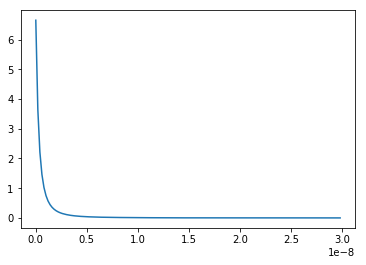

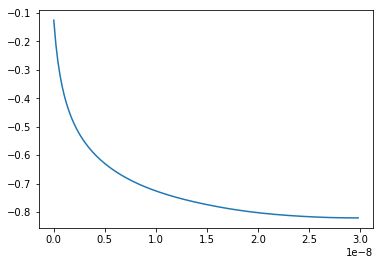

In [166]:
plt.plot(z, qden_old*1000)
plt.figure()
plt.plot(z, -Vz)